# Face Recognition with CNN
Face recognition is the process of identifying or verifying a person's identity using their face. It's used in various applications like security systems, unlocking devices, and personalized services.

Objective: To identify or verify a person's identity using their face.

Approach: Using a CNN model to extract features from face images, then classifying these features to recognize faces.

Dataset: A collection of face images used for training the model.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Set your train_dir path
train_dir = "Dataset/Original Images/"

In [4]:
# Using ImageDataGenerator for data augmentation
generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1  # 10% of the data will be used for validation
)

In [5]:
# Load and split the data into training and validation sets
train_ds = generator.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    subset="training"  # This is for training data
)

Found 2318 images belonging to 31 classes.


In [6]:
val_ds = generator.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    subset="validation"  # This is for validation data
)

Found 244 images belonging to 31 classes.


In [7]:
# Get the list of classes
classes = list(train_ds.class_indices.keys())

In [8]:
# Build the model
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=["accuracy"]
)

In [10]:
# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 63, 63, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 6, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 2, 2, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          32,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 31)                  │           1,0

 Total params: 461,343 (1.76 MB)

 Trainable params: 460,255 (1.76 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [11]:
# Train the model using the training set and validate on the validation set
history = model.fit(train_ds, epochs=30, validation_data=val_ds, batch_size=32)

Epoch 1/30


C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


73/73 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.0680 - loss: 3.5984 - val_accuracy: 0.0369 - val_loss: 3.6562
Epoch 2/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.1165 - loss: 3.1716 - val_accuracy: 0.0328 - val_loss: 4.4616
Epoch 3/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.1639 - loss: 2.9088 - val_accuracy: 0.0287 - val_loss: 4.6012
Epoch 4/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.2078 - loss: 2.6464 - val_accuracy: 0.0574 - val_loss: 4.2903
Epoch 5/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.2766 - loss: 2.4411 - val_accuracy: 0.0615 - val_loss: 3.8369
Epoch 6/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.3230 - loss: 2.2538 - val_accuracy: 0.1189 - val_loss: 3.1087
Epoch 7/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.3871 - loss: 1.9886 - val_accuracy: 0.2541 - val_loss: 2.6584
Epoch 8/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.4503 - loss: 1.8172 - val_accuracy: 0.2418 - val_loss: 2.

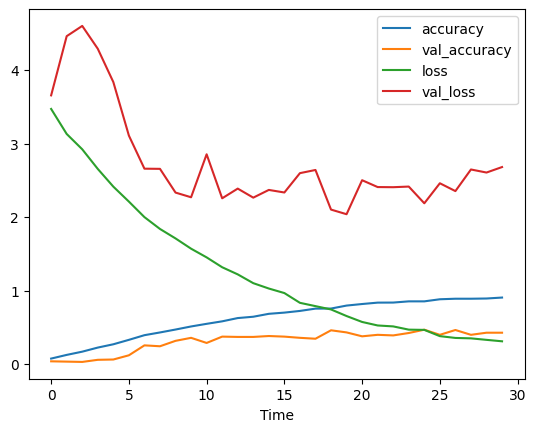

In [12]:
# Plot the training and validation accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'val_accuracy', 'loss', 'val_loss'])
plt.show()

In [13]:
train_loss, train_accuracy = model.evaluate(train_ds)
print(f"Training Accuracy: {train_accuracy*100: .2f}")

73/73 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.9067 - loss: 0.2940
Training Accuracy:  90.38


In [14]:
validation_loss, validation_accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {validation_accuracy*100: .2f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4056 - loss: 2.7536
Validation Accuracy:  44.67


In [15]:
# Evaluate the model on the test set
test_ds = generator.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    subset="validation"  # Use a portion of the data for testing
)

Found 244 images belonging to 31 classes.


In [16]:
# Get accuracy on the test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4262 - loss: 2.5246
Test Accuracy: 44.67%


In [17]:
# Load the image
img_path = 'Dataset/Original Images/Hrithik Roshan/Hrithik Roshan_5.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Rescale to [0, 1]

In [18]:
# Predict with the model
predictions = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


In [19]:
# Get the predicted class
predicted_class_idx = np.argmax(predictions, axis=1)[0]
predicted_class = classes[predicted_class_idx]

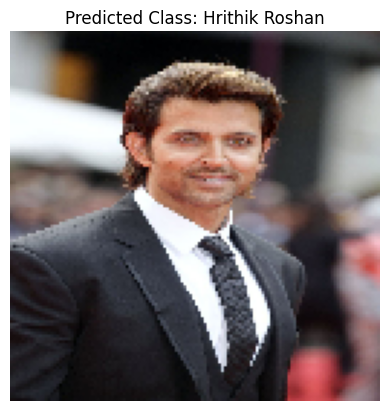

In [20]:
# Display the image and predicted class
plt.imshow(img)
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()

In [21]:
# Optionally, you can also display the predicted probabilities for each class
predicted_probabilities = {classes[i]: prob for i, prob in enumerate(predictions[0])}
print("Predicted Probabilities:", predicted_probabilities)

Predicted Probabilities: {'Akshay Kumar': 0.00040147844, 'Alexandra Daddario': 2.2873791e-11, 'Alia Bhatt': 1.3258035e-09, 'Amitabh Bachchan': 1.6554591e-06, 'Andy Samberg': 5.5729556e-06, 'Anushka Sharma': 1.7953292e-08, 'Billie Eilish': 9.415242e-10, 'Brad Pitt': 0.0029819044, 'Camila Cabello': 6.545514e-10, 'Charlize Theron': 5.0644648e-11, 'Claire Holt': 2.3248817e-14, 'Courtney Cox': 3.6259153e-09, 'Dwayne Johnson': 5.7764726e-10, 'Elizabeth Olsen': 7.753195e-09, 'Ellen Degeneres': 2.1462708e-11, 'Henry Cavill': 9.548922e-06, 'Hrithik Roshan': 0.939609, 'Hugh Jackman': 0.016324123, 'Jessica Alba': 2.868971e-12, 'Kashyap': 8.553807e-15, 'Lisa Kudrow': 2.7633308e-14, 'Margot Robbie': 1.1894956e-11, 'Marmik': 6.883489e-11, 'Natalie Portman': 5.103546e-10, 'Priyanka Chopra': 1.3030987e-10, 'Robert Downey Jr': 0.034866717, 'Roger Federer': 7.2978326e-09, 'Tom Cruise': 0.0057613794, 'Vijay Deverakonda': 3.5933232e-07, 'Virat Kohli': 1.5895633e-08, 'Zac Efron': 3.8343027e-05}
